<a href="https://colab.research.google.com/github/urah001/wiresharkDataset/blob/main/NIDS_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Network Intrusion Dection System (NIDS) using Machine Learning (ML)

# Problem Statement

As cyber threats continue to evolve in complexity and frequency, organizations face significant challenges in protecting their networks from malicious activities. Traditional security measures often fall short in detecting sophisticated attacks, leading to severe data breaches and financial losses. This project aims to address the increasing need for an effective Network Intrusion Detection System (NIDS) that can identify both normal and abnormal network traffic, allowing for timely responses to potential threats. The primary challenge lies in developing a machine learning-based system capable of accurately classifying network packets while minimizing false positives and negatives.
Objectives

    Develop an Intrusion Detection System: Create a machine learning-based NIDS that can effectively distinguish between normal and abnormal network traffic.

    Data Collection and Preprocessing: Capture network traffic data in a controlled environment, convert it into a structured format, and preprocess it for analysis.

    Implement Machine Learning Models: Utilize various machine learning algorithms, including SVM, KNN, Logistic Regression, Decision Trees, Random Forest, to classify network traffic.

    Evaluate Model Performance: Assess the effectiveness of each model using appropriate performance metrics to identify the best-performing algorithm for intrusion detection.

    Visualize Results: Create visualizations to communicate the performance of each model clearly, highlighting areas for improvement and potential insights.

# Evaluation Criteria

The performance of the NIDS will be evaluated using the following metrics:

    Accuracy: The proportion of true results (both true positives and true negatives) among the total number of cases examined.

    Precision: The ratio of true positive predictions to the total predicted positives, indicating the model's ability to identify relevant instances.

    Recall (Sensitivity): The ratio of true positive predictions to the total actual positives, reflecting the model's ability to capture all relevant instances.

    F1-Score: The harmonic mean of precision and recall, providing a balance between the two metrics and indicating overall model performance.

    Confusion Matrix: A summary of prediction results showing true positives, true negatives, false positives, and false negatives, helping to identify specific areas of improvement.

# About the Data
Background
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
• Normal
• Anomalous


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## DATASET

### Train data
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
• Normal
• Anomalous

In [ ]:
train=pd.read_csv('https://raw.githubusercontent.com/urah001/wiresharkDataset/refs/heads/main/Train_data.csv')

### Test data
The test dataset used was sourced from the CUSTECH campus WiFi by connecting to a captive portal/WiFi access point. Wireshark was employed to scan the network traffic, capturing various packets for analysis. To simulate and identify abnormal network behavior, tools such as `hping3`, `msfconsole`, and `nmap` were utilized to inject abnormal packets into the network. These actions help create a balanced dataset for training and testing network intrusion detection systems (NIDS).



In [ ]:
test=pd.read_csv('https://raw.githubusercontent.com/urah001/wiresharkDataset/refs/heads/main/custech_test_data.csv')

The `train.head()` function displays the first five rows of the training dataset, providing a quick overview of the data structure, feature types, and initial values, which is essential for understanding the dataset's characteristics and ensuring proper data preprocessing.

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


The `train.info()` function provides a concise summary of the training dataset, including the number of entries, column data types, and any missing values.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

The `train.describe()` function generates descriptive statistics for the training dataset, summarizing key metrics such as count, mean, standard deviation, minimum, and maximum values for numerical features.

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `train.describe(include='all')` function generates summary statistics for all features, including categorical and numerical data, in the training dataset.

In [ ]:
train.describe(include='all') #removed object because it throws error , Includes a summary of all columns regardless of data type

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


The `train.shape` attribute returns the dimensions of the training dataset, indicating the number of rows and columns.

In [ ]:
train.shape

(25192, 42)

The `train.isnull().sum()` function calculates and displays the total number of missing values for each column in the training dataset.

In [ ]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


This code calculates the number and percentage of missing values in each column of the training dataset, identifying columns with null values and printing their respective counts and proportions.

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

This code outputs the total count of duplicate rows in the training dataset.

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


The `sns.countplot(x=train['class'])` function creates a count plot to visualize the distribution of classes in the training dataset, showing the frequency of each class label.

<Axes: xlabel='class', ylabel='count'>

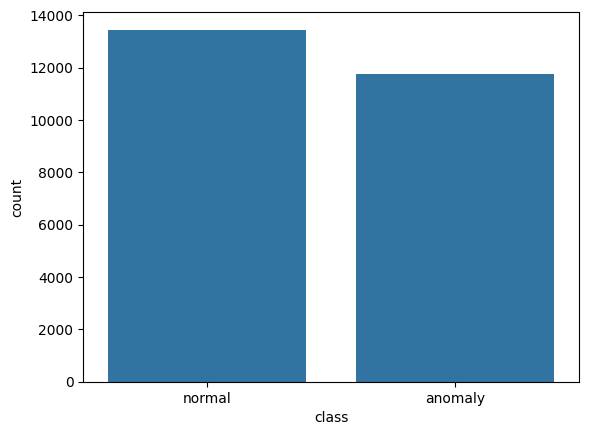

In [ ]:
sns.countplot(x=train['class'])

This code prints the distribution of class labels in the training dataset, displaying the count of each unique class present.


In [ ]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


This function encodes categorical variables in the given DataFrames (`train` and `test`) by applying label encoding to columns with object data types, converting them into numerical values for machine learning compatibility.

In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

This code conditionally removes the `num_outbound_cmds` column from the training and test datasets if it exists, ensuring that the data is clean and relevant for analysis.

In [ ]:
if 'num_outbound_cmds' in train.columns: #added this line for condition
    train.drop(['num_outbound_cmds'], axis=1, inplace=True)
if 'num_outbound_cmds' in test.columns: #added this line
    test.drop(['num_outbound_cmds'], axis=1, inplace=True)

The `train.head()` function displays the first five rows of the training dataset, allowing for a quick inspection of the data structure and content.

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


This code separates the features (`X_train`) by dropping the `class` column from the training dataset and assigns the target labels (`Y_train`) to the `class` column.

In [ ]:

X_train = train.drop(['class'], axis=1)
Y_train = train['class']

This code initializes a Random Forest classifier and uses Recursive Feature Elimination (RFE) to select the top 10 features from the training data (`X_train`) that best predict the target labels (`Y_train`). It then creates a list of the selected feature names.

In [ ]:
## random forest classifier model
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

This code updates `X_train` to only include the features selected through the Recursive Feature Elimination (RFE) process, effectively reducing the dimensionality of the training dataset to the most important features for the model.

In [ ]:
X_train = X_train[selected_features]

This code standardizes the features in both the training (`X_train`) and test datasets by scaling them. It transforms the data such that each feature will have a mean of 0 and a standard deviation of 1, which helps improve the performance of many machine learning algorithms. The `StandardScaler` fits the transformation on the training data and applies it to both the training and test sets.

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

This code splits the dataset into training and testing sets.

- `X_train` and `Y_train` are split into `x_train`, `y_train` for training and `x_test`, `y_test` for testing.
- 70% of the data is used for training (`train_size=0.70`), and the remaining 30% is used for testing.
- `random_state=2` ensures that the split is reproducible.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(17634, 10)

This will return the dimensions of the x_train dataset

In [ ]:
x_test.shape

(7558, 10)

This will return the dimensions of the y_train dataset

In [ ]:
y_train.shape

(17634,)

In [ ]:
y_test.shape

(7558,)

The `time` module is used to measure the training and testing duration of machine learning models, helping assess their computational efficiency.

In [ ]:
import time

This code applies the Logistic Regression algorithm to the dataset, fitting the model to the training data and calculating the time taken to complete the training process using the `time` module.

# Build Model

### **Logistic Regression**

This code implements a Logistic Regression algorithm to fit the training data (`x_train`, `y_train`) and measures the training time, outputting the duration taken for the fitting process.
Here's a more detailed breakdown of what the code does:

1. **Model Initialization**:
   - The `LogisticRegression` model is created from the `sklearn.linear_model` library.
   - The parameter `max_iter=1200000` sets a high limit for the number of iterations to ensure that the model converges (this is useful if the dataset is complex and requires more iterations for the algorithm to settle on optimal weights).

2. **Training the Model**:
   - The `fit()` method trains the logistic regression model using the training data (`x_train` and `y_train`).
   - It adjusts the model’s internal weights based on the input features (`x_train`) and the corresponding labels (`y_train`).
   - The code records the time taken to train the model by noting the time at the start and end of training. The difference between these two times is printed as the "Training time."

3. **Making Predictions**:
   - Once the model is trained, it uses the `predict()` method to predict labels for the unseen test data (`x_test`).
   - This step outputs a set of predicted values (`y_pred`), which represents the classes predicted by the model for the test dataset.

4. **Confusion Matrix**:
   - A confusion matrix is computed using the `confusion_matrix()` function from the `sklearn.metrics` module.
   - The confusion matrix provides a table showing the number of correct and incorrect predictions:
     - **True Positives (TP)**: Correct predictions of the positive class.
     - **True Negatives (TN)**: Correct predictions of the negative class.
     - **False Positives (FP)**: Incorrect predictions where the model predicted positive but the true class was negative (Type I error).
     - **False Negatives (FN)**: Incorrect predictions where the model predicted negative but the true class was positive (Type II error).
   - This matrix gives insight into the model’s classification accuracy and its tendency to make certain types of errors.

5. **Visualization**:
   - The confusion matrix is visualized using a heatmap generated by `seaborn` (`sns.heatmap()`).
   - The matrix is displayed with color gradients (shades of blue), where darker shades represent higher values. The actual numbers in each cell are shown using `annot=True`.
   - The x-axis of the plot represents the predicted labels, and the y-axis represents the true labels.
   - The labels on both axes (`xticklabels` and `yticklabels`) correspond to the target class names (in this case, `target_names`).
   - Finally, the matrix is given a title for context: "Confusion Matrix for Logistic Regression."

### Overall Purpose:
The code implements a logistic regression model to classify the test data, measures the model’s performance in terms of classification errors (confusion matrix), and visually interprets the model’s strengths and weaknesses. The confusion matrix helps understand how well the model is distinguishing between different classes and where it may be making errors.

In [ ]:
##logistic regression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Initialize the Logistic Regression model
clfl = LogisticRegression(max_iter = 1200000)

# Train the model before making predictions !!!
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Make predictions on the test set
y_pred = clfl.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Training time:  0.11594891548156738


NameError: name 'target_names' is not defined

<Figure size 600x400 with 0 Axes>

This code measures the time taken to make predictions on the training data using the Logistic Regression model and prints the total testing time.

In [ ]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

This code initializes a Logistic Regression model with a fixed random state for reproducibility and fits the model to the training data.

In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

This code evaluates the Logistic Regression model by calculating and printing the training and test scores, which represent the model's accuracy on the respective datasets.

In [ ]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

In [ ]:
pip install optuna #ignore if requirement satisfied

In [ ]:
!pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

### **KNeighbors Classifier**

This function defines an objective for Optuna's hyperparameter optimization, where it suggests the number of neighbors for a K-Nearest Neighbors (KNN) classifier. It fits the classifier to the training data and evaluates its accuracy on the test data, returning the accuracy as the optimization target.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

This code creates an Optuna study to optimize the K-Nearest Neighbors (KNN) classifier's hyperparameter, specifically the number of neighbors. It aims to maximize the accuracy by running a single trial of the objective function. Finally, it prints the best trial results, including the optimal hyperparameters and the corresponding accuracy score.

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

This code trains a K-Nearest Neighbors (KNN) model using an optimized number of neighbors, then evaluates the model by making predictions on the test set. It computes and visualizes a confusion matrix to show the comparison between actual and predicted labels. Finally, the code prints the model’s training and test accuracy scores to assess its overall performance.

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)
# Make predictions on the test set
y_knn_pred = KNN_model.predict(x_test)

# Compute the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_knn_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.show()
KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

### **Decision Tree Classifier**

This code implements a Decision Tree Classifier using the `scikit-learn` library. It initializes the model with the `entropy` criterion and a maximum depth of 4, then trains the model on the training dataset. After making predictions on the test set, it computes the confusion matrix to evaluate the model's performance. Finally, the confusion matrix is visualized with a heatmap using Seaborn, clearly displaying the counts of true and predicted labels.

In [ ]:
## decision tree classifier algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

# Make predictions on the test set
y_dt_pred = clfd.predict(x_test)

# Compute the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_dt_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

This code measures the time taken to make predictions using the trained Decision Tree classifier (`clfd`) on the training dataset (`x_train`). The predicted values are stored in `y_test_pred`, and the elapsed time for the prediction process is printed, which helps evaluate the model's performance and efficiency during inference.

In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

This function defines an optimization objective for tuning the hyperparameters of a Decision Tree classifier using Optuna. It takes a `trial` object as input and suggests values for the maximum depth (`dt_max_depth`) and maximum features (`dt_max_features`) of the Decision Tree. The classifier is then trained on the training dataset, and its accuracy is evaluated on the test dataset. The function returns the accuracy, which Optuna will use to determine the best hyperparameter configuration during optimization.

In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

This code creates an Optuna study to optimize the hyperparameters of a Decision Tree classifier. The `create_study` function initializes a study, specifying that the objective is to maximize the accuracy. The `optimize` method runs the optimization process for a specified number of trials (in this case, 30), each time evaluating the `objective` function. After optimization, the best trial's results, including the best hyperparameters and the corresponding accuracy, are printed, allowing for analysis of the most effective configuration for the Decision Tree model.

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

This code snippet initializes a Decision Tree classifier using the optimal hyperparameters obtained from the Optuna study. It fits the model on the training data (`x_train` and `y_train`), then evaluates its performance on both the training set and the test set by calculating the accuracy scores. Finally, it prints the training and test scores, providing insights into how well the model has learned from the training data and how it performs on unseen data.

In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

### **Support Vector Machine**

This code trains a Support Vector Machine (SVM) model with a radial basis function (RBF) kernel. It makes predictions on a test dataset, computes the confusion matrix to compare actual and predicted values, and then visualizes the confusion matrix using a heatmap. The confusion matrix provides insight into the classification performance of the SVM. Finally, the code displays the prediction completion message.

In [ ]:
## adding support vector machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define a seed value
SEED = 42 # you can use any integer

# Define SVM model with default parameters
svm_model = SVC(kernel='rbf', random_state=SEED)

# Create a dictionary to store the models
models = {}

# Add SVM to the models dictionary
models['SVM'] = svm_model

# Train SVM model
models['SVM'].fit(x_train, y_train)

#initialize preds as a dictionary
preds = {}

# Predict with SVM model
preds['SVM'] = models['SVM'].predict(x_test)
# Compute the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, preds['SVM'])
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


print("SVM Predictions complete.")



This code evaluates the performance of the Support Vector Machine (SVM) model using several metrics. It first imports necessary functions from the `sklearn.metrics` module.

1. It prints a header for the SVM model testing section.
2. It calculates and displays the confusion matrix to visualize the performance of the model across different classes.
3. A line separator is printed for better readability.
4. Finally, it prints a classification report, which includes precision, recall, F1-score, and support for each class, providing a comprehensive overview of the model's performance on the test data (`y_test`).

In [ ]:
# Import metrics if not done already
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Define the line function if it's not defined elsewhere
def line(model_name='', char='='):
  """
  This function generates a line of characters with the model name in the center.

  Args:
    model_name: The name of the model to be displayed.
    char: The character used to create the line.

  Returns:
    A string containing the line of characters.
  """
  if model_name:
    return char * 20 + ' ' + model_name + ' ' + char * 20
  else:
    return char * 50

# Assuming your target variables are binary (e.g., 'Yes' and 'No')
target_names = ['Yes', 'No'] # Replace with your actual target names

# Evaluate SVM model
print(line('SVM'), 'SVM Model Testing', line('SVM'))
print(confusion_matrix(y_test, preds['SVM']))
print(line('SVM','-'))
print(classification_report(y_test, preds['SVM'], target_names=target_names))

This code snippet computes and visualizes the F1-scores for the Support Vector Machine (SVM) model along with any other models you may have included in the `f1s` dictionary.

1. **Compute F1-Score**: The F1-score for the SVM model is calculated using `f1_score()` and stored in the `f1s` dictionary.

2. **DataFrame Creation**: The F1-scores are then converted into a Pandas DataFrame, `f1s_df`, with the model names as the index and the F1-scores as the values. The scores are multiplied by 100 for better readability (to represent them as percentages).

3. **Plotting**: Finally, a bar plot is generated from the DataFrame, with the y-axis limited to a range between 80 and 100 for clearer visualization. The `figsize` parameter sets the dimensions of the plot, and `rot=0` keeps the x-axis labels horizontal for easy reading.

This visualization allows for a quick comparison of the model's performance based on their F1-scores.

In [ ]:
f1s = {}
# Compute F1-score for SVM and other models
f1s['SVM'] = f1_score(y_test, preds['SVM'])

# Convert F1-scores to DataFrame for visualization
f1s_df = pd.DataFrame(list(f1s.values()), index=f1s.keys(), columns=["F1-score"])*100

# Plot F1-scores
f1s_df.plot(kind="bar", ylim=[80, 100], figsize=(10,6), rot=0)




This code trains a Support Vector Machine (SVM) model and evaluates its performance:

1. **Training the Model**: The SVM model is instantiated and fitted using the training data (`x_train` and `y_train`).

2. **Performance Metrics**: The training and test scores are obtained and stored in `svm_train` and `svm_test`.

3. **Updating Results**: The SVM scores are added to the existing list of models, which includes KNN, Logistic Regression, and Decision Tree.

4. **Displaying Results**: Finally, the results are printed in a formatted table using the `tabulate` function.

This provides a clear summary of the performance of each model on the training and test datasets.

In [ ]:
# Train the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(x_train, y_train)

# Get the train and test scores for SVM
svm_train, svm_test = svm_model.score(x_train, y_train), svm_model.score(x_test, y_test)

# Add the SVM results to the data list
data = [
    ["KNN", KNN_train, KNN_test],
    ["Logistic Regression", lg_train, lg_test],
    ["Decision Tree", dt_train, dt_test],
    ["SVM", svm_train, svm_test]  # Add the SVM scores
]

# Print the updated table with SVM
col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


This code snippet initializes several machine learning models for classification tasks:

1. **Setting Seed**: The variable `SEED` is set to `42` to ensure reproducibility in model training and results.

2. **Decision Tree Classifier**: The `DecisionTreeClassifier` is instantiated as `dtc`, which can be used for building a decision tree model.

3. **K-Nearest Neighbors (KNN)**: The `KNeighborsClassifier` is initialized as `knn`, allowing for KNN classification.

4. **Logistic Regression**: The `LogisticRegression` model is created as `lr`, which is suitable for binary or multi-class classification tasks.

5. **Support Vector Machine (SVM)**: The `SVC` (Support Vector Classification) model is instantiated as `svm`, ready for training on the dataset.

These model instances can later be trained on your dataset and evaluated for performance.

In [ ]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

# Support Vector Machine

svm = SVC()

This code snippet creates a dictionary named `models` to store different machine learning classifiers. Here's a brief breakdown:

1. **Importing Cross-Validation**: The `cross_val_score` function from `sklearn.model_selection` is available for performing cross-validation on the models later.

2. **Creating the Models Dictionary**:
   - A dictionary named `models` is initialized to hold the different classifiers.
   - The K-Nearest Neighbors classifier (`knn`) is stored with the key `'KNeighborsClassifier'`.
   - The Logistic Regression model (`lr`) is associated with the key `'LogisticRegression'`.
   - The Decision Tree classifier (`dtc`) is stored with the key `'DecisionTreeClassifier'`.
   - The Support Vector Machine model (`svm`) is associated with the key `'SupportVectorMachine'`.


In [ ]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['SupportVectorMachine']= svm

This code snippet performs cross-validation for multiple classifiers and stores the precision and recall scores in a nested dictionary. Here's a concise explanation:

1. **Initialize Scores Dictionary**: An empty dictionary named `scores` is created to store the results.

2. **Iterate Over Models**: A loop iterates through each model stored in the `models` dictionary.

3. **Nested Dictionary for Each Model**: For each model, a new dictionary is created within `scores` to hold its performance metrics.

4. **Cross-Validation for Precision and Recall**:
   - A nested loop iterates over the list of scoring metrics (`'precision'` and `'recall'`).
   - The `cross_val_score` function is used to evaluate the model using 10-fold cross-validation. The scores for each metric are computed on the training data (`x_train`, `y_train`) and stored in the corresponding model's dictionary.

After running this code, the `scores` dictionary will contain the precision and recall scores for each model across the 10 folds of cross-validation. You can access these scores easily for further analysis or reporting.

In [ ]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

This code snippet is designed to display the validation results of different machine learning models, specifically focusing on their precision and recall scores. Here's a brief breakdown:

    Line Function: The line function generates a decorative line of asterisks based on the length of the model name, ensuring the output is neatly formatted.

    Iterate Over Models: The outer loop iterates over each model in the models dictionary, printing a formatted header for each model indicating that it is being validated.

    Nested Loop for Scores: Within the outer loop, there’s a nested loop that iterates over the list of metrics ('precision' and 'recall').

    Calculate and Print Metrics:
        For each scorer, the mean and standard deviation of the cross-validation scores are calculated using NumPy functions np.mean and np.std, respectively.
        The results are rounded to two decimal places and printed in a formatted string, indicating the mean percentage and standard deviation for each score.

In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

This code snippet processes the cross-validation scores for the different models and visualizes the results as a bar chart. Here's a breakdown of what each part does:

1. **Calculate Mean Scores**:
   - The first loop iterates through each model in the `models` dictionary.
   - The inner loop then iterates through the specified metrics (`'precision'` and `'recall'`).
   - For each model and metric, it calculates the mean score from the stored cross-validation results, updating the `scores` dictionary accordingly.

2. **Create DataFrame**:
   - The `scores` dictionary is converted into a Pandas DataFrame. The `swapaxes` function is used to switch the index and columns, making it easier to plot with models as columns and metrics as rows.

3. **Visualization**:
   - The scores are multiplied by 100 to convert them from decimal form to percentages.
   - The `plot` method is called on the DataFrame to create a bar chart. The `ylim` parameter is set to `[80, 100]` to focus on scores in this range, the figure size is set to `(24, 6)` for clarity, and `rot=0` ensures that the x-axis labels remain horizontal.

### Example Output
The bar chart produced by this code will show the precision and recall scores for each model side by side, making it visually straightforward to compare their performances. Each bar will represent the average score across the 10-fold cross-validation, clearly indicating which models performed best in terms of precision and recall.

This visualization helps to quickly identify which algorithms are performing well and can guide decisions on which model to choose for further tuning or deployment.

In [ ]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

The code initializes a dictionary named `models` to store various machine learning classifiers for easy access and management. Each key in the dictionary represents the model's name (e.g., `'KNeighborsClassifier'`, `'LogisticRegression'`, etc.), while the corresponding value is the classifier instance. This structure simplifies model training and evaluation, allowing for easy iteration and modification of the classifiers in your machine learning pipeline.

In [ ]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['SupportVectorMachine']= svm

The code initializes an empty dictionary called `preds` to store the predictions made by each model in the `models` dictionary. It iterates through the `models`, fits each classifier to the training data (`x_train`, `y_train`), and then predicts the class labels for the test data (`x_test`). Finally, it stores these predictions in the `preds` dictionary. The message "Predictions complete." indicates that all predictions have been successfully generated.

In [ ]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

The code imports necessary metrics from `sklearn` for model evaluation and defines a helper function `line` to format output with a specified symbol. It sets the `target_names` to represent the two classes: "normal" and "anomaly." For each model in the `models` dictionary, it prints a header with the model name, computes the confusion matrix comparing the true labels (`y_test`) with the predicted labels (`preds[name]`), and outputs the classification report, which includes precision, recall, F1-score, and support for each class. This process helps assess the performance of each model on the test data.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

This code computes the F1-scores for each model stored in the `models` dictionary by comparing the true labels (`y_test`) with their corresponding predictions (`preds[name]`). The results are then organized into a DataFrame named `f1s`, with the model names as the index and the F1-scores as a column. The F1-scores are multiplied by 100 for percentage representation. Finally, it generates a bar plot to visualize the F1-scores of the models, setting the y-axis limit between 80 and 100 to highlight the performance of each model.

In [ ]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)